# California Housing Dataset Analysis
1. Develop a program to create histograms for all numerical features and analyze the distribution of each feature.
2. Generate box plots for all numerical features and identify any outliers.
3. Use California Housing dataset.

In [3]:
# Run this cell first to install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - ---------------------

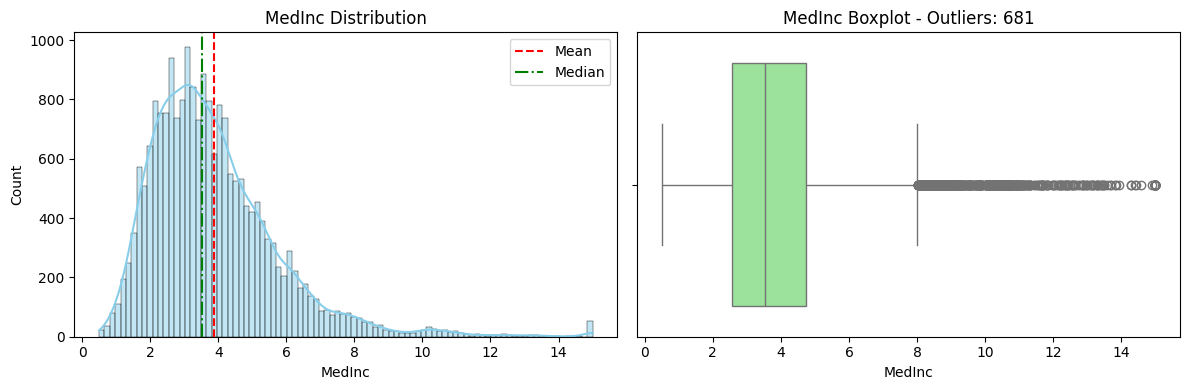

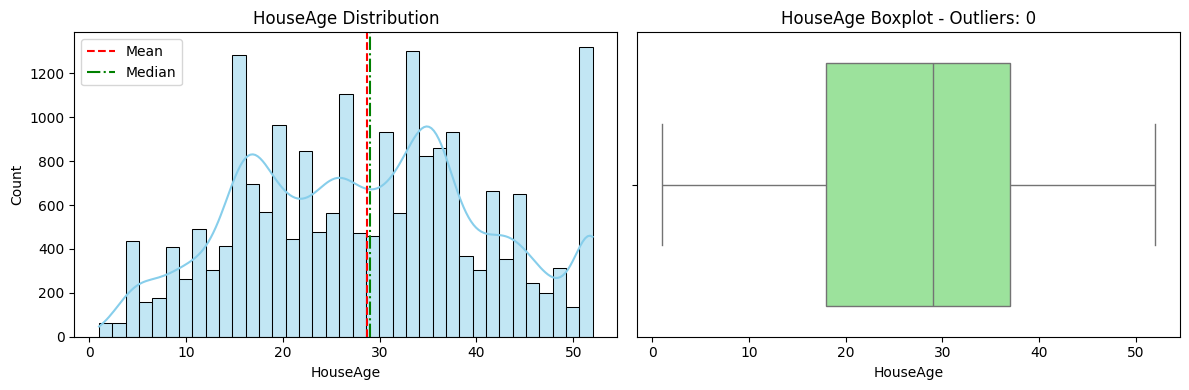

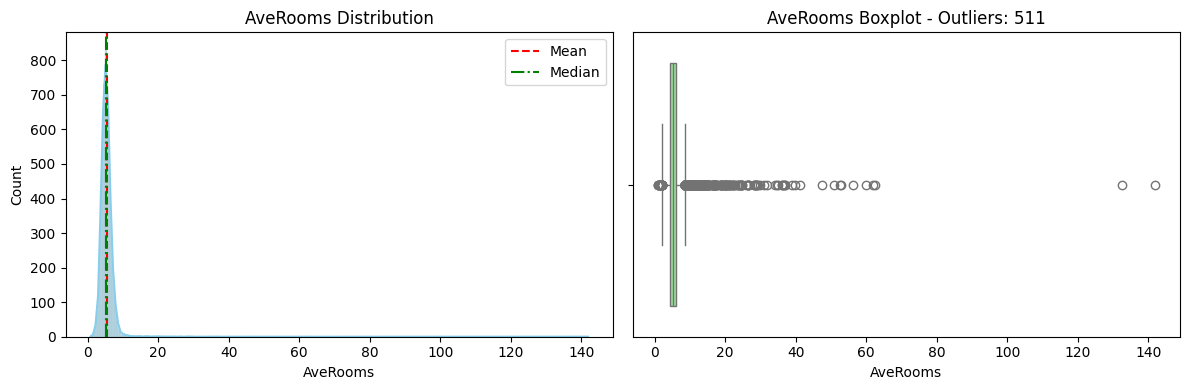

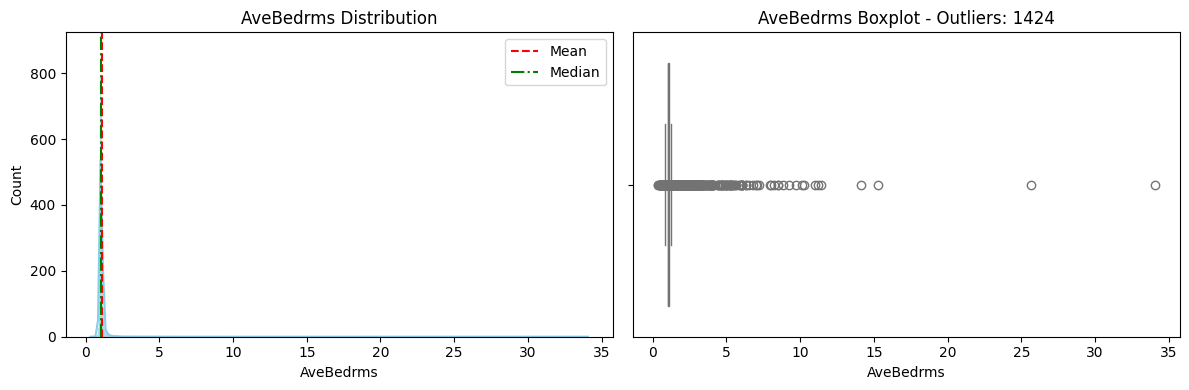

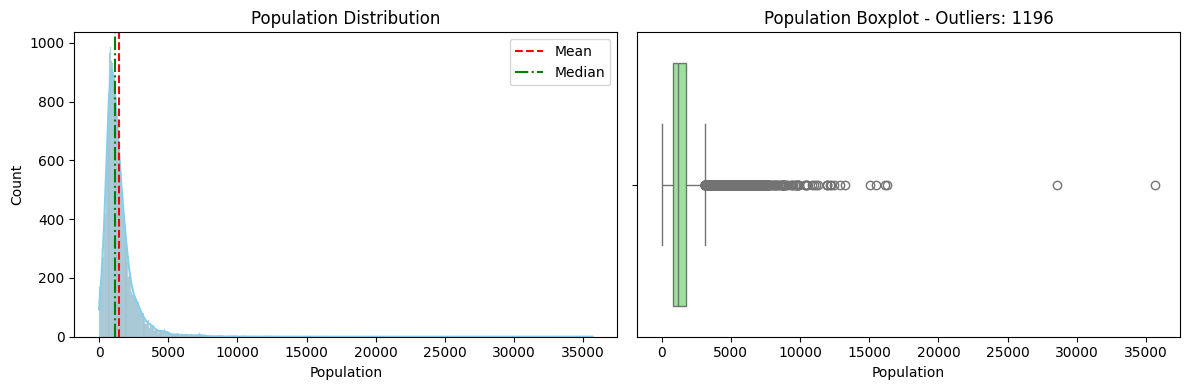

C:\Users\Dhana\AppData\Local\Temp\ipykernel_6000\3962510255.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Dhana\Desktop\lab\ml_lab\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dhana\Desktop\lab\ml_lab\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


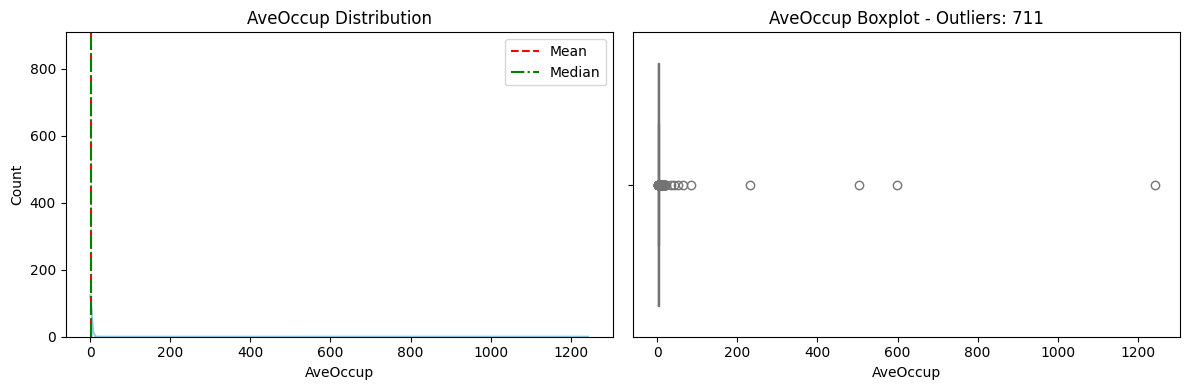

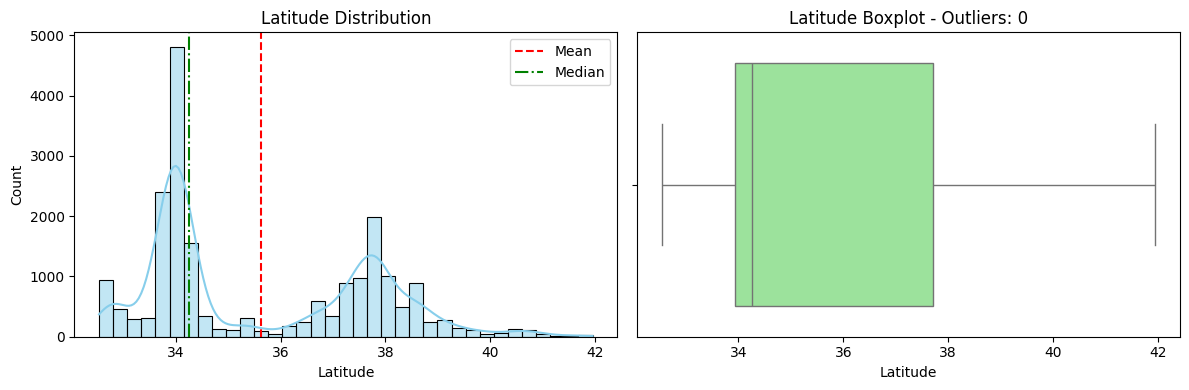

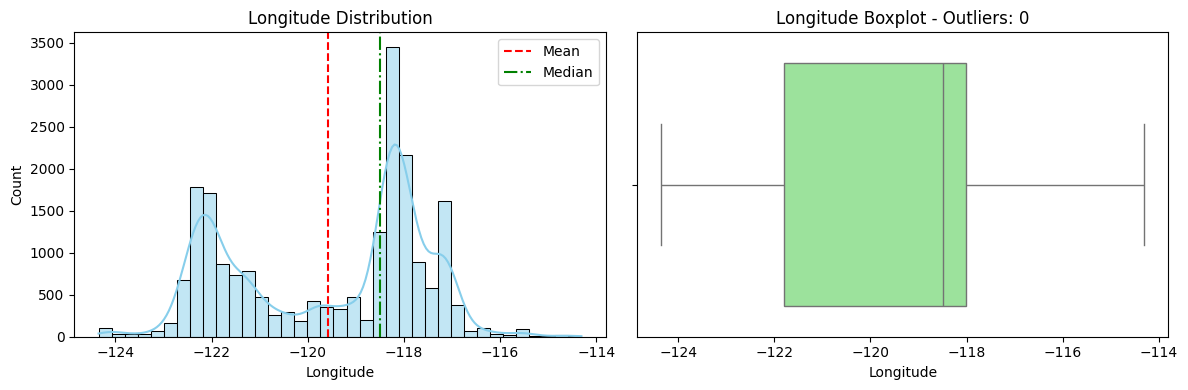

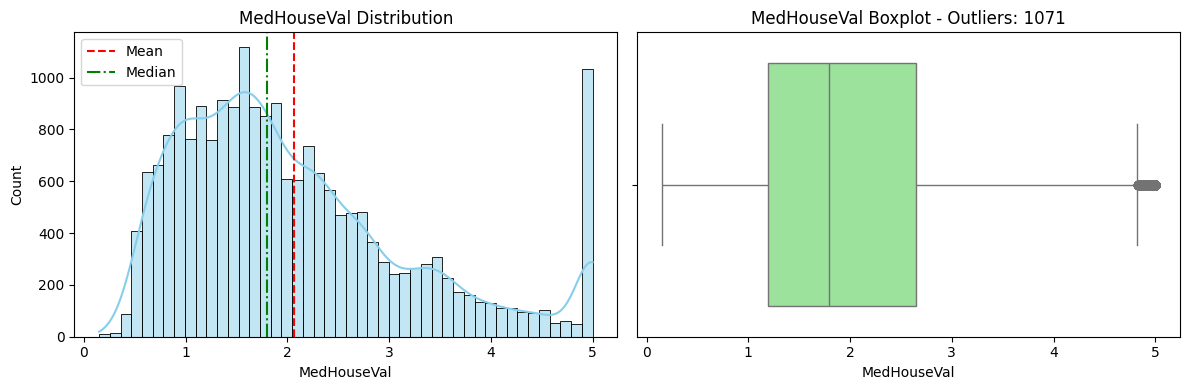

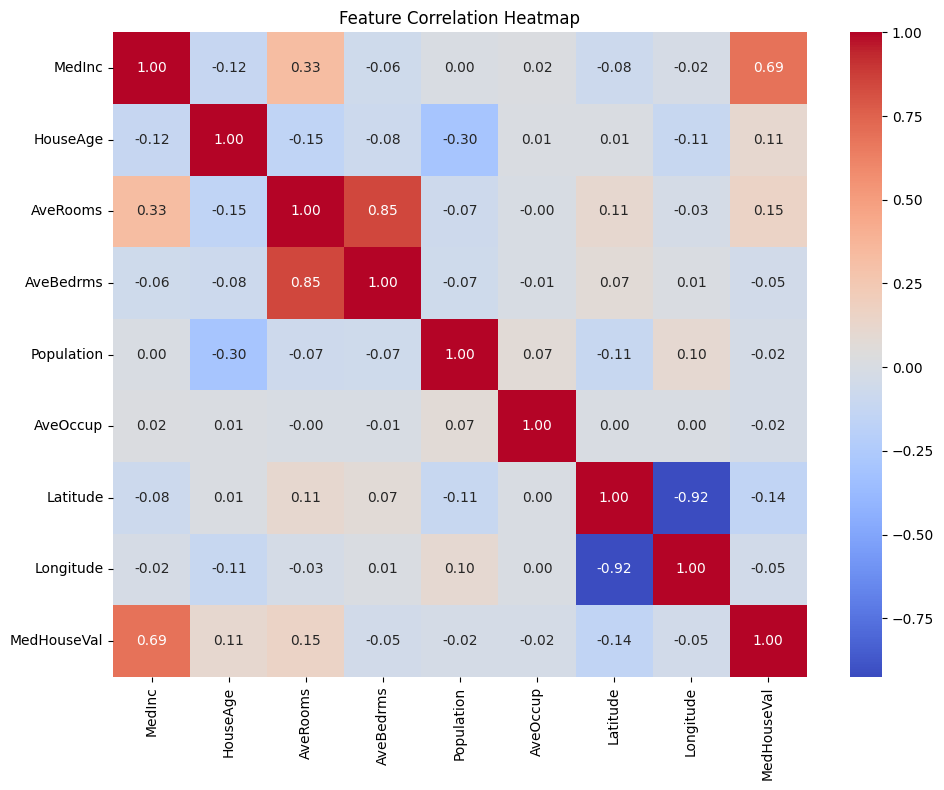

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Function to identify outliers using IQR method
def get_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return len(data[(data < lower) | (data > upper)])

# Analyze each numerical feature
for col in df.columns:
    # Create subplots - histogram and boxplot side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot histogram with distribution
    sns.histplot(df[col], kde=True, ax=ax1, color='skyblue')
    ax1.axvline(df[col].mean(), color='red', ls='--', label='Mean')
    ax1.axvline(df[col].median(), color='green', ls='-.', label='Median')
    ax1.set_title(f'{col} Distribution')
    ax1.legend()
    
    # Plot boxplot and identify outliers
    sns.boxplot(x=df[col], ax=ax2, color='lightgreen')
    outliers_count = get_outliers(df[col])
    ax2.set_title(f'{col} Boxplot - Outliers: {outliers_count}')
    
    plt.tight_layout()
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## Analysis Summary:

- **Histograms** show the distribution pattern of each feature - whether it's normal, skewed, or multi-modal
- **Box plots** reveal the median, quartiles, and outliers in each feature
- **Outliers** are identified using the IQR method (values > Q3+1.5×IQR or < Q1-1.5×IQR)
- **Correlation heatmap** shows relationships between features (stronger colors = stronger correlations)

Key improvements to the code:
1. Added function to count and identify outliers
2. Used subplot layout to show histogram and boxplot together
3. Added outlier counts to boxplot titles
4. Improved visualization with clear titles and labels